# Q4.3)

In [ ]:
import numpy as np
from collections import defaultdict
import math
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Import Dataset

### Importing vocab

In [ ]:
vocab ={}
with open("hw4_vocab.txt") as file:
  f = file.readlines()
  # print(f)
  for i,l in enumerate(f):
    vocab[i+1]=l
    # break
for key in vocab:
  vocab[key] = vocab[key][:-1]

# vocab[1]

### Importing Unigram

In [ ]:
unigram = defaultdict(int)
with open("hw4_unigram.txt") as file:
  f = file.readlines()
  # print(f)
  for i,l in enumerate(f):
    unigram[vocab[i+1]]=int(l[:-1])
    # break


# unigram["THE"]

### Importing Bigrams

In [ ]:
bigram = defaultdict(list)
with open("hw4_bigram.txt") as file:
  f = file.readlines()
  # print(f)
  for i,l in enumerate(f):
    #PREPROCESS
    l = l.split("\t")
    l[-1] = l[-1][:-1]
    l = list(map(int,l))
    # print(l)
    # print(vocab[l[0]])
    bigram[vocab[l[0]]].append((vocab[l[1]],l[2]))
    # print(bigram)
    # unigram[vocab[i]]=int(l[:-1])
    # break


# bigram["THE"][:10]

## Q4.3 A)

In [ ]:
def prob(key):
  return unigram[key]/sum(unigram.values())
print("Words\t\tprobability")
print("_"*50)
for key in unigram:
  if key[0] == "M":
    print(key,"\t\t",prob(key))


Words		probability
__________________________________________________
MILLION 		 0.002072759168154815
MORE 		 0.0017088989966186725
MR. 		 0.0014416083492816956
MOST 		 0.0007879173033190295
MARKET 		 0.0007803712804681068
MAY 		 0.0007298973156289532
M. 		 0.0007034067394618568
MANY 		 0.0006967290595970209
MADE 		 0.0005598610827336895
MUCH 		 0.0005145971758110562
MAKE 		 0.0005144626437991272
MONTH 		 0.00044490959363187093
MONEY 		 0.00043710673693999306
MONTHS 		 0.0004057607781605526
MY 		 0.0004003183467688823
MONDAY 		 0.00038198530259784006
MAJOR 		 0.00037089252670515475
MILITARY 		 0.00035204581485220204
MEMBERS 		 0.00033606096579846475
MIGHT 		 0.00027358919153183117
MEETING 		 0.0002657374141083427
MUST 		 0.0002665079156312084
ME 		 0.00026357267173457725
MARCH 		 0.0002597935452176646
MAN 		 0.0002528834918776787
MS. 		 0.0002389900041002911
MINISTER 		 0.00023977273580605944
MAKING 		 0.00021170446604452378
MOVE 		 0.0002099555498894477
MILES 		 0.00020596851026319035

## Q4.3 B)

In [ ]:
def bigramProb(word):
  theFollower = defaultdict(int)

  # FOR THE
  sumi = 0
  followers = bigram[word]
  for i in followers:
    sumi += i[1]

  for i in followers:
    theFollower[i[0]] = i[1]/sumi

  theFollowers = (sorted(theFollower.items(), key=lambda item: item[1],reverse=True))
  return theFollowers

print('For word "The": ')
print("Words\t\tprobability")
print("_"*50)
for i in bigramProb("THE")[:10]:
  print(i[0],"\t\t",i[1])

For word "The": 
Words		probability
__________________________________________________
<UNK> 		 0.6150198100055118
U. 		 0.013372499432610317
FIRST 		 0.011720260675031612
COMPANY 		 0.011658788055636611
NEW 		 0.009451480076516552
UNITED 		 0.008672308141231398
GOVERNMENT 		 0.006803488635995202
NINETEEN 		 0.006650714911000876
SAME 		 0.006287066757449016
TWO 		 0.006160749602827221


## Q 4.3) C)

### Unigram Lu

In [ ]:
ip = "THE STOCK MARKET FELL BY ONE HUNDRED POINTS LAST WEEK"
ip = ip.split()

In [ ]:
# ip[0]

In [ ]:
sumi = 0
for i in range(len(ip)):
  sumi += math.log(unigram[ip[i]]/sum(unigram.values()))
print("Lu = ",sumi)

Lu =  -64.50944034364878


### Bigram Lb

In [ ]:
ip = "<s> THE STOCK MARKET FELL BY ONE HUNDRED POINTS LAST WEEK"
ip = ip.split()

In [ ]:
sumi = 0
for i in range(0,len(ip)-1):
  word1,word2 = ip[i],ip[i+1]
  # print(word1,word2,end=" ")
  probs = dict(bigramProb(word1))
  # print("\t",probs[word2])
  sumi += math.log(probs[word2])
print("Lb = ",sumi)

Lb =  -40.91813213378977


### Bigram yields the higest log likelihood

## 4.3) D)

### Unigram Lu

In [ ]:
ip = "THE SIXTEEN OFFICIALS SOLD FIRE INSURANCE"
ip = ip.split()

In [ ]:
# ip[0]

In [ ]:
sumi = 0
for i in range(len(ip)):
  sumi += math.log(unigram[ip[i]]/sum(unigram.values()))
print("Lu = ",sumi)

Lu =  -44.291934473132606


### Bigram Lb

In [ ]:
ip = "<s> THE SIXTEEN OFFICIALS SOLD FIRE INSURANCE"
ip = ip.split()

In [ ]:
sumi = 0
for i in range(0,len(ip)-1):
  word1,word2 = ip[i],ip[i+1]
  # print(word1,word2,end=" ")
  probs = dict(bigramProb(word1))
  # print("\t",probs[word2])
  if word2 not in probs:
    sumi = float("-inf")
    print(word2,"|",word1, " not present")
    continue
  sumi += math.log(probs[word2])
print("Lb = ",sumi)

OFFICIALS | SIXTEEN  not present
FIRE | SOLD  not present
Lb =  -inf


### Using this model, the Bigram becomes -infinite because the word pairings are not present, hence log(0) = inf

## Q4.3 E)

In [ ]:
# my_default_dict = defaultdict(int,d)

In [ ]:
ip = "<s> THE SIXTEEN OFFICIALS SOLD FIRE INSURANCE"
ip = ip.split()

In [ ]:
best_Lm = []
for lambdaa in tqdm(range(1,10001)):
  sumi = 0

  for i in range(0,len(ip)-1):
    word1,word2 = ip[i],ip[i+1]
    # print(word1,word2,end=" ")
    probs = dict(bigramProb(word1))
    # print("\t",probs[word2])
    # if word2 not in probs:
    #   sumi = float("-inf")
    #   print(word2,"|",word1, " not present")
    #   continue
    probs = defaultdict(int,probs)
    sumi += math.log((1-(lambdaa/10000))*(probs[word2])+(lambdaa/10000)*(unigram[word2]/sum(unigram.values())))
  best_Lm.append(sumi)

print("best lambda = ", (best_Lm.index(max(best_Lm)))/10000)
print("best Lm = ", (max(best_Lm)))

  0%|          | 0/10000 [00:00<?, ?it/s]

best lambda =  0.6478
best Lm =  -42.964137160084704


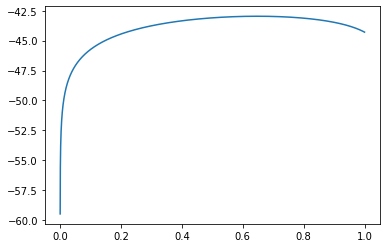

In [ ]:
plt.plot(np.linspace(0/10000,10000/10000,10000),best_Lm)
plt.show()

# Q4.4

## Q4.4 A)

In [ ]:
s2000 = []
with open("/content/nasdaq00.txt") as file:
  f = file.readlines()
  # print(f)
  for i,l in enumerate(f):
    s2000.append(l)
    # break
# print(s2000[0])
for key in range(len(s2000)):
  s2000[key] = float(s2000[key][:-1])

# print(s2000[0])
# print(s2000[0])

In [ ]:
s2001 = []
with open("/content/nasdaq01.txt") as file:
  f = file.readlines()
  # print(f)
  for i,l in enumerate(f):
    s2001.append(l)
    # break
# print(s2001[0])
for key in range(len(s2001)):
  s2001[key] = float(s2001[key][:-1])

# print(s2001[0])
# print(s2001[0])

In [ ]:
s2000 = np.array(s2000)
y_00 = s2000[3:]
# print(y_00)
y_00 = y_00.reshape(-1,1)
# print(y_00.shape)

In [ ]:
X_00 = []
for i in range(len(s2000)-3):
  tmp = []
  tmp.extend([s2000[i],s2000[i+1],s2000[i+2]])
  X_00.append(tmp)
X_00 = np.array(X_00)
# print((X_00.shape))

In [ ]:
# y = Xb
b_00 = []
theta,residuals,rank,s = np.linalg.lstsq(X_00, y_00)
# print(theta)
print("Linear Coefficients:")
print("a1:",theta[2][0])
print("a2:",theta[1][0])
print("a3:",theta[0][0])

Linear Coefficients:
a1: 0.9506722769536844
a2: 0.015603326703986786
a3: 0.031894723175170614


## Q4.4 B)

#### RMSE 00

In [ ]:
y_00_pred = np.dot(X_00, theta)

MSE_00 = ((y_00 - y_00_pred)**2).mean()
print("MSE:",MSE_00)
print("RMSE 2000:",math.sqrt(MSE_00))

MSE: 13902.375020416126
RMSE 2000: 117.9083331254247


#### RMSE 01

In [ ]:
X_01 = []
for i in range(len(s2001)-3):
  tmp = []
  tmp.extend([s2001[i],s2001[i+1],s2001[i+2]])
  X_01.append(tmp)

s2001 = np.array(s2001)
y_01 = s2001[3:]
# print(y_00)
y_01 = y_01.reshape(-1,1)
# print(y_01.shape)


X_01 = np.array(X_01)
# print((X_01.shape))
y_01_pred = np.dot(X_01, theta)

MSE_01 = ((y_01 - y_01_pred)**2).mean()
print("MSE:",MSE_01)
print("RMSE 2001:",math.sqrt(MSE_01))

MSE: 2985.0983142892514
RMSE 2001: 54.63605324590395
